**MOVIE RECOMMENDATION SYSTEM**

Movie recommendation system is very useful in our social life because of its strength in providing entertainment. It helps movie enthusiasts by  suggesting movies without them having to go through a process of choosing from a large set of movies thus, saving time and efforts. The project focuses on finding different model using content based recommendation system approach with the help of different algorithms.


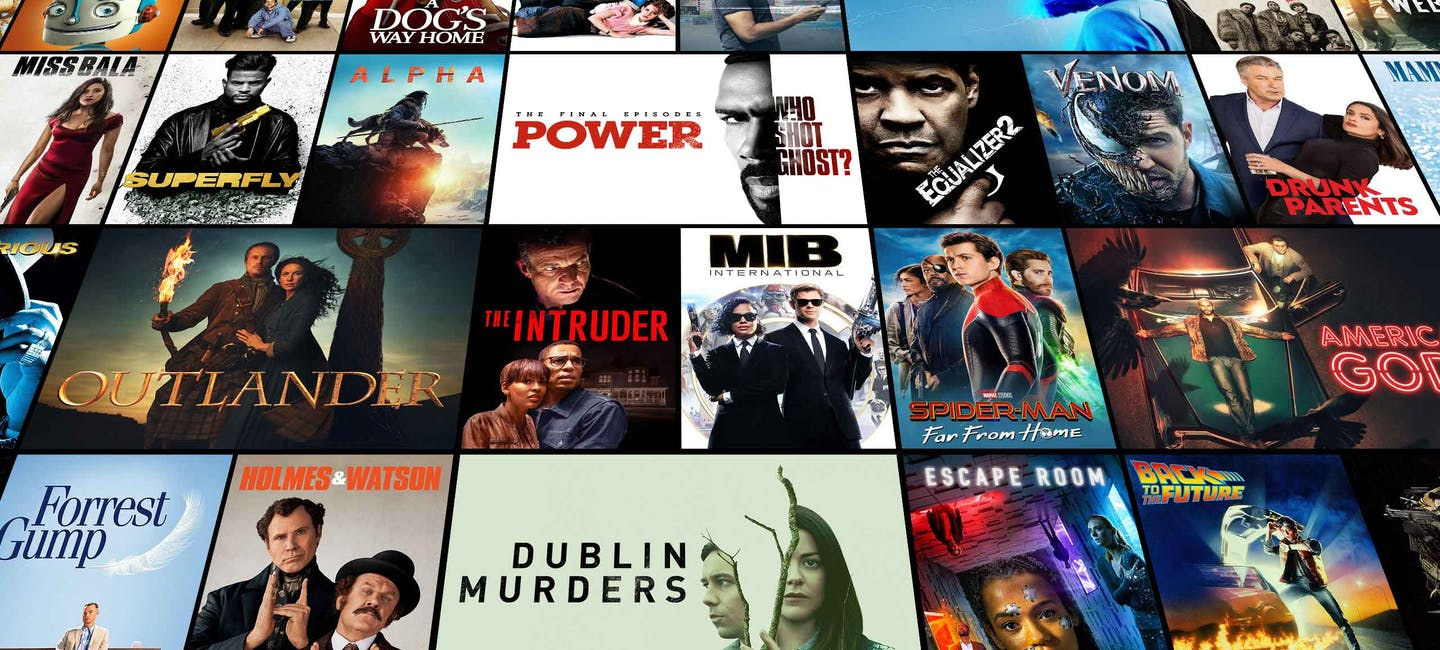


# **IMPORTING LIBRARIES**

In [5]:
!pip install rfpimp
!pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [6]:
#importing the necessary libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as exp


from rfpimp import permutation_importances
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

# clustering 1d array
from scipy.signal import argrelextrema
from sklearn.neighbors.kde import KernelDensity

# data processing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# text processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# db operations
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


# **UPLOADING DIFFERENT DATASETS**

In [4]:
#Uploading the required dataset
from google.colab import files
uploaded = files.upload()

Saving IMDb movies.csv to IMDb movies.csv
Saving IMDb ratings.csv to IMDb ratings.csv
Saving netflix_titles.csv to netflix_titles.csv


# **READING DATASET**

In [8]:
#Reading the netflix_titles.csv file
all_data=pd.read_csv("netflix_titles.csv")
all_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
#counting number non null parameter values in the dataset
all_data.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [10]:
tvshows=all_data[all_data['type']=='TV Show']
tvshows.count()


show_id         2410
type            2410
title           2410
director         184
cast            2118
country         2133
date_added      2400
release_year    2410
rating          2408
duration        2410
listed_in       2410
description     2410
dtype: int64

In [11]:
#creating a new dataset with type as Movie
movies=all_data[all_data['type']=='Movie']

# **COUNT OF MOVIES AND TV-SHOWS**

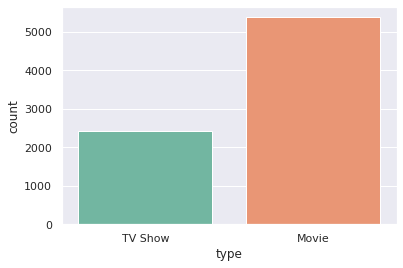

In [12]:
#plot for number of TV shows and movies from the dataset
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=all_data, palette="Set2")

Here, the number of movies are greater than number of TV-shows

# **DISTRIBUTION OF CONTENT UPLOADED**

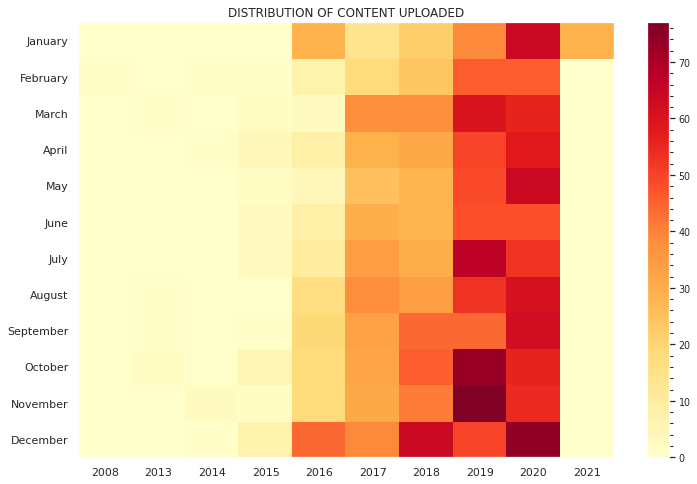

In [13]:
#Extracting year and month from the date parameter
date = tvshows[['date_added']].dropna()
date['year'] = date['date_added'].apply(lambda x : x.split(', ')[-1])
date['month'] = date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

#defining the months in order
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

#creating a new dataset with year and month as new parameters 
dataframe = date.groupby('year')['month'].value_counts().unstack().fillna(0)[month].T
plt.figure(figsize=(12, 8))
plt.pcolor(dataframe, cmap='YlOrRd') # heatmap
plt.xticks(np.arange(0.5, len(dataframe.columns), 1), dataframe.columns)
plt.yticks(np.arange(0.5, len(dataframe.index), 1), dataframe.index )

plt.title('DISTRIBUTION OF CONTENT UPLOADED')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=9.5) 
cbar.ax.minorticks_on()
plt.show()

Here we can see that less content is released in January in all the years unitll 2020. Morover we can notice that most content was added in 2020 comapared to other years. Thus the content business did not affect during the pandemic

# **MOVIE RATING ANALYSIS**

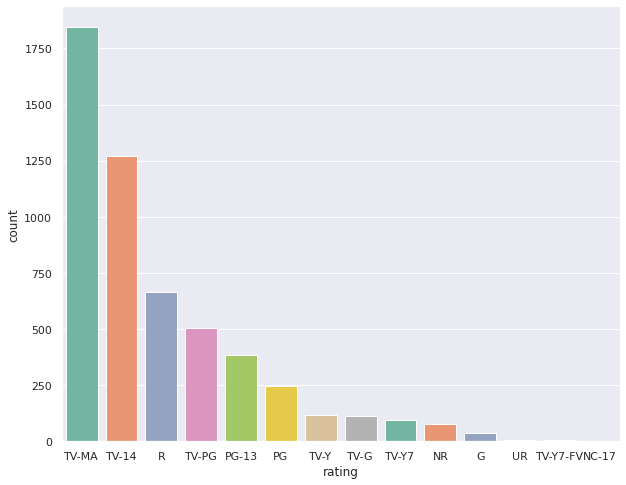

In [14]:
#count of different types of movie rating in the dataset
plt.figure(figsize=(10,8))
ax = sns.countplot(x="rating", data=movies, palette="Set2", order=movies['rating'].value_counts().index[0:15])

We can see that more than 1750 content was added with rating "TV-MA" which is for adults. Least content was added in category "G" which is general audiences which is surprising as most of the audience is looking of General movies and belong to General category. Lastly almost no movies are made for "TV-Y7-FV", UR, and NC-17 categories.

# **TOP RATED TV-SHOWS AND MOVIES ON NETFLIX**


In [15]:
#reading IMDb ratings.csv and IMDb movies.csv file 
imdb_rates=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_movies=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
rate = pd.DataFrame({'Title':imdb_movies.title, 
                    'Release Year':imdb_movies.year,
                    'Rating': imdb_rates.weighted_average_vote,
                    'Genre':imdb_movies.genre})
#removing duplicates
rate.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
rate.shape

(85852, 4)

In [16]:
#merging required parameters and creating a new dataset 
rate.dropna()
concat_data =rate.merge(all_data,left_on='Title',right_on='title',how='inner')
concat_data =concat_data .sort_values(by='Rating', ascending=False)

In [17]:
import plotly.express as exp
best_ten=concat_data [0:10]
fig =exp.sunburst(
    best_ten,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

# **Year wise analysis**

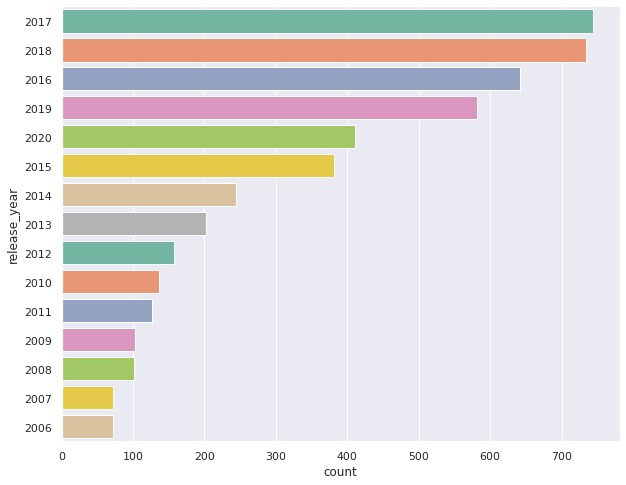

In [18]:
#count of movies according to release year
plt.figure(figsize=(10,8))
ax = sns.countplot(y="release_year", data=movies, palette="Set2", order=movies['release_year'].value_counts().index[0:15])

We can see that least number of movies were released in 2006 and maximum number of movies were released in 2017.

In [19]:
#bifurcating the movies based on countries
country={}
movies['country']=movies['country'].fillna('Unknown')
temp = list(movies['country'])
for k in temp:
    #print(i)
    k=list(k.split(','))
    if len(k)==1:
        if k in list(country.keys()):
            country[k]+=1
        else:
            country[k[0]]=1
    else:
        for m in k:
            if m in list(country.keys()):
                country[m]+=1
            else:
                country[m]=1

In [20]:
final={}
for cnty,no in country.items():
    cnty=cnty.replace(' ','')
    if cnty in list(final.keys()):
        final[cnty]+=no
    else:
        final[cnty]=no
        
final={x: y for x, y in sorted(final.items(), key=lambda item: item[1], reverse= True)}


# **Analysis of duration of movies**

In [21]:
#removing the min word from duration parameter
movies['duration']=movies['duration'].str.replace(' min','')
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

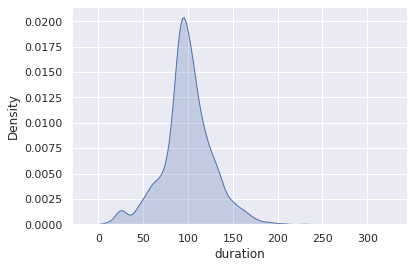

In [22]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies['duration'], shade=True)

Here, we see that most of the content of netflix movies is of duration 85-95 minutes. Average duration of movies on netflix is between 70 - 120 minutes. There are hardly any movies exceeding duration of 200 minutes.  

In [23]:
from collections import Counter
#preprocessing the 'listed in' paramter values

movie_category =list(movies['listed_in'])
category =[]

for k in movie_category :
    k=list(k.split(','))
    for m in k:
        category .append(m.replace(' ',""))
genre_counter=Counter(category )

# **Types of Genres**

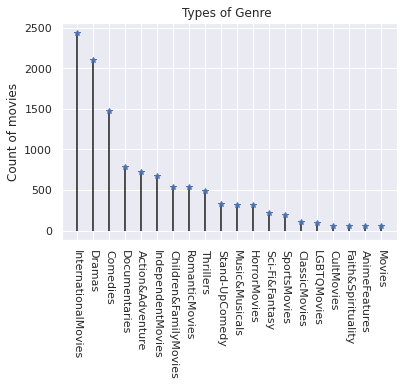

In [24]:
#counting movies based on the "Genre" parameter
genre_counter={i: j for i, j in sorted(genre_counter.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

x=list(genre_counter.keys())
y=list(genre_counter.values())
ax.vlines(x, ymin=0, ymax=y)
ax.plot(x,y, "*")
ax.set_xticklabels(x, rotation = 270)
ax.set_ylabel("Count of movies")
ax.set_title("Types of Genre ");

Here we can notice that most of the content on Netflix belongs to "International Movies genre" and "Dramas". "Faith and Spirituality, "Anime Features" and "Movies" are the genres with least content on Netflix

# **Looking at the TV-SHOWS provided on Netflix**

In [25]:
#counting the TV-shows based on the country
nations={}
tvshows['country']=tvshows['country'].fillna('Unknown')
cou1=list(tvshows['country'])
for k in cou1:
    k=list(k.split(','))
    if len(k)==1:
        if k in list(nations.keys()):
            nations[k]+=1
        else:
            nations[k[0]]=1
    else:
        for m in k:
            if m in list(nations.keys()):
                nations[m]+=1
            else:
                nations[m]=1

In [26]:
final11={}
for nation,no in nations.items():
    nation=nation.replace(' ','')
    if nation in list(final11.keys()):
        final11[nation]+=no
    else:
        final11[nation]=no
        
final11={x: y for x, y in sorted(final11.items(), key=lambda item: item[1], reverse= True)}

# **SORTING TV SHOWS ON NETFLIX ACCORDING TO THE NUMBER OF SEASONS**

In [27]:
#removing the word "Season" from the 'duration' parameter 
parameters=['title','duration']
length= tvshows[parameters]

length['num_szns']=length['duration'].str.replace(' Season','')
length['num_szns']=length['num_szns'].str.replace('s','')

In [28]:
#Computing the length of season
length['num_szns']=length['num_szns'].astype(str).astype(int)

In [29]:
h2=['title','num_szns']
highest=length[h2]

highest=highest.sort_values(by='num_szns', ascending=False)

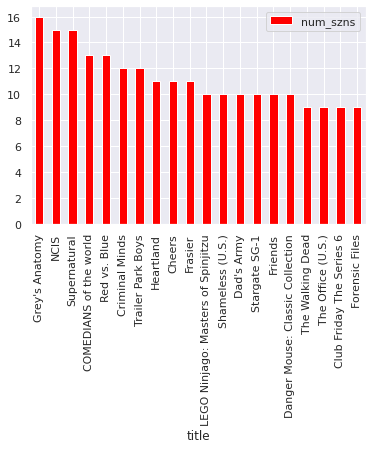

In [30]:
#ploting different TV-shows based on the number of seasons
highest20=highest[0:20]
highest20.plot(kind='bar',x='title',y='num_szns', color='red')

Here we can see that highest season count of the shows in the dataset is 16.

# **HIGHEST DURATION**

In [31]:
#plot for the most preferred duration of 'TV-shows' and 'Movie'
highest_dur=pd.value_counts(all_data['duration'])
fig = go.Figure([go.Bar(x=highest_dur.index, y=highest_dur.values , text=highest_dur.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

Having one as the season count is recommended for TV-shows

# **1ST TYPE OF RECOMMENDATION SYSTEM**

In [32]:
#reading and merging IMDb ratings.csv, IMDb movies.csv and netflix_titles.csv file
imdb_rates=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote','total_votes'])
imdb_movies=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
rate = pd.DataFrame({'Title':imdb_movies.title,
                    'Release Year':imdb_movies.year,
                    'Rating': imdb_rates.weighted_average_vote,
                    'total_votes': imdb_rates.total_votes, 
                    'Genre':imdb_movies.genre})
rate.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
rate.shape

(85852, 5)

In [33]:
#Obtaining a new dataset with integrated paramters of 3 different datasets
rate.dropna()
jointabc=rate.merge(movies,left_on='Title',right_on='title',how='inner')
jointabc=jointabc.sort_values(by='Rating', ascending=False)

In [34]:
jointabc.head()

,Title,Release Year,Rating,total_votes,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
282,Pulp Fiction,1994,8.9,1780147,"Crime, Drama",s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
272,Schindler's List,1993,8.9,1183248,"Biography, Drama, History",s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1032,Inception,2010,8.8,2002816,"Action, Adventure, Sci-Fi",s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."
157,Gol Maal,1979,8.6,17381,"Comedy, Romance",s2464,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,"December 31, 2019",1979,TV-PG,137,"Classic Movies, Comedies, International Movies",When circumstances at work compel Ram to prete...
1372,Much Ado About Nothing,2011,8.6,556,"Comedy, Romance",s4266,Movie,Much Ado About Nothing,Alejandro Fernández Almendras,"Agustín Silva, Paulina García, Daniel Alcaíno,...","Chile, United States, France","October 1, 2016",2016,TV-MA,96,"Dramas, Independent Movies, International Movies",Carefree college student Vicente ends up in a ...


In [35]:
jointabc.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2394.0,5.930952,1.274590,1.6,5.20,6.1,6.8,8.9
total_votes,2394.0,28007.200919,104159.044290,100.0,445.25,1737.0,10288.0,2002816.0
release_year,2394.0,2012.842523,8.892816,1946.0,2012.00,2016.0,2018.0,2020.0
duration,2394.0,110.532999,24.379949,8.0,93.00,105.0,125.0,228.0


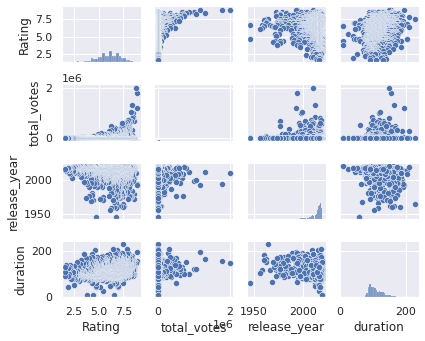

In [36]:
sns.pairplot(jointabc, height=1.2, aspect=1.25);

In [37]:
#Identifying null values in the combined dataset
jointabc.isnull().sum()

Title            0
Release Year     0
Rating           0
total_votes      0
Genre            0
show_id          0
type             0
title            0
director        11
cast            34
country          0
date_added       0
release_year     0
rating           1
duration         0
listed_in        0
description      0
dtype: int64

In [38]:
cols = [
    'Title',
    'Release Year',
    'Rating',
    'Genre',
    'type',
    'country',
    'director',
    'total_votes',
    'cast',
    'duration',
    'description',
]

### **LABEL ENCODING**

Using Label Encoding to covert string values into numeric form

In [39]:
#label encoding for 'director' parameter
le = LabelEncoder()
data1 = jointabc[cols].dropna().copy()
data1['director'] = le.fit_transform(data1['director'])

In [40]:
#label encoding for 'type' parameter
le = LabelEncoder()
datase1 = data1[cols].dropna().copy()
datase1['type'] = le.fit_transform(datase1['type'])

In [41]:
#label encoding for 'country' parameter
le = LabelEncoder()
dataset1 = datase1[cols].dropna().copy()
dataset1['country'] = le.fit_transform(dataset1['country'])

In [42]:
maindata = dataset1

In [43]:
#label encoding for 'Title' parameter
le = LabelEncoder()
dataset2 = dataset1[cols].dropna().copy()
dataset2['Title'] = le.fit_transform(dataset2['Title'])

In [44]:
#label encoding for 'cast' parameter
le = LabelEncoder()
dataset3 = dataset2[cols].dropna().copy()
dataset3['cast'] = le.fit_transform(dataset3['cast'])

In [45]:
#label encoding for 'Genre' parameter
le = LabelEncoder()
dataset = dataset3[cols].dropna().copy()
dataset['Genre'] = le.fit_transform(dataset['Genre'])

## **`Calculating Feature Importances`**

In [46]:
#calclating the feature importance
def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    dataframe1 = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)
    
    return dataframe1

In [47]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

In [48]:
#computing drop column feature importance based on the input training model
def drop_col_feat_imp(model, X_train, y_train, random_state=42):
    model_clone = clone(model)
    model_clone.random_state = random_state
    
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    
    importances = []
    
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)
        importances.append(benchmark_score - drop_col_score)
        #computing the difference of orignal feature importance to dropped feature importance 
    
    return imp_df(X_train.columns, importances),importances;

In [49]:
#Defining parameters for X and Y training and test dataset
X = dataset.drop(['Rating',	'description', 'type'], axis=1)
y = dataset['Rating']

In [50]:
#dividing dataset in 20:80 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [51]:
#using RandomForestRegressor() function to fit the above obtained training dataset
rf = RandomForestRegressor().fit(X_train, y_train)

In [52]:
display(rf.score(X_train, y_train))

0.9061832327415302

In [53]:
#computing root mean square error
lm = rf.predict(X_test)
rms = sqrt(mean_squared_error(y_test, lm))
display(rms)

1.0920973685621544

In [54]:
def plot_feature_importance(imp,names,kind ):
#forming arrays from parameter imp and parameter titles
 parameter_imp=np.array(imp)
 parameter_title = np.array(names)

#Forming a dataset using inputs
 data={'parameter_title':parameter_title,'parameter_imp':parameter_imp}
 datatype = pd.DataFrame(data)

#Sorting the dataset in order decreasing feature importance
 datatype.sort_values(by=['parameter_imp'], ascending=False, inplace=True)

#size of plot
 plt.figure(figsize=(10,8))

#Plot Searborn bar chart
 sns.barplot(x=datatype['parameter_imp'], y=datatype['parameter_title'])
#title to plot
 plt.title(kind  + 'FEATURE IMPORTANCE')
 plt.xlabel('PARAMETER IMPORTANCE')
 plt.ylabel('PARAMTER')

 **RESULTS OF FEATURE IMPORTANCES**

Feature Importances using Random Forest Regressor 

In [55]:
imp_df(X.columns, rf.feature_importances_)

,Importance
Feature,
total_votes,0.269878
Genre,0.147028
duration,0.140260
cast,0.099051
Release Year,0.095129
director,0.092680
Title,0.088566
country,0.067408


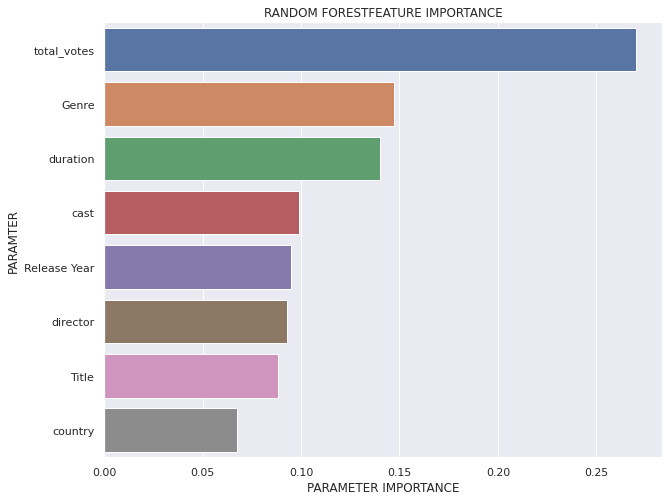

In [56]:
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')

Permutation Feature Importances

In [57]:
imp_df(X.columns, rf.feature_importances_)

,Importance
Feature,
total_votes,0.269878
Genre,0.147028
duration,0.140260
cast,0.099051
Release Year,0.095129
director,0.092680
Title,0.088566
country,0.067408


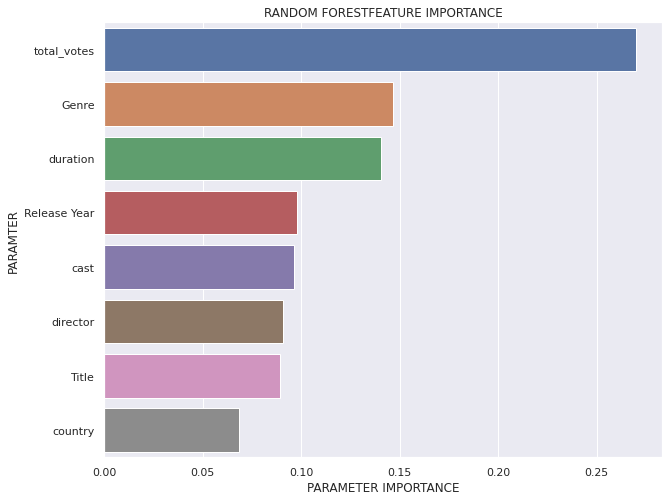

In [58]:
x =  [0.089335,
  0.097954,
  0.146513,
  0.068449,
  0.091018,
  0.269791,
  0.096437,
  0.140503 ]

plot_feature_importance(x,X.columns,'RANDOM FOREST')

Drop Column Feature Importance

In [59]:
z,ph = drop_col_feat_imp(rf, X_train, y_train)

dataframe = pd.DataFrame(z) 
display(dataframe)  

,Importance
Feature,
total_votes,0.026020
Genre,0.009337
Release Year,0.007524
duration,0.004387
country,0.003729
director,0.000397
Title,-0.000396
cast,-0.000625


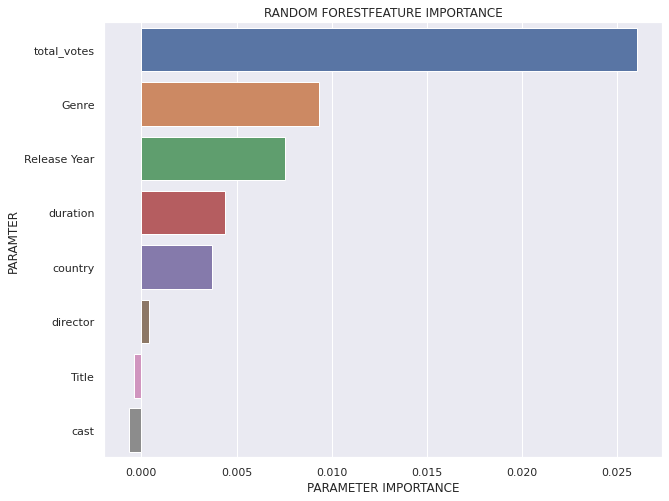

In [60]:
plot_feature_importance(ph, X.columns,'RANDOM FOREST')

## **Computing score based on drop column feature importance**

After droping title and cast from the drop column feature importance 

In [61]:
#calculating the score for each movie in the dataset
maindata['value'] = (
   0.041571 * maindata['total_votes'].astype(float)  + 0.005489 * maindata['duration'].astype(float) + 
   0.008869 * maindata['Release Year'].astype(float) + 0.005625 * maindata['director'].astype(float) +
   0.005332 * maindata['country'].astype(float) 
)

In [62]:
#maindata = maindata.reset_index(drop=True)

In [63]:
maindata.sort_values(by='value', ascending=False).head(20)

,Title,Release Year,Rating,Genre,type,country,director,total_votes,cast,duration,description,value
1032,Inception,2010,8.8,"Action, Adventure, Sci-Fi",0,261,304,2002816,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",148,"In this mind-bending sci-fi thriller, a man ru...",83280.804650
282,Pulp Fiction,1994,8.9,"Crime, Drama",0,221,1169,1780147,"John Travolta, Samuel L. Jackson, Uma Thurman,...",154,This stylized crime caper weaves together stor...,74028.775026
1192,Django Unchained,2012,8.4,"Drama, Western",0,221,1169,1317856,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",165,"Accompanied by a German bounty hunter, a freed...",54811.095886
272,Schindler's List,1993,8.9,"Biography, Drama, History",0,221,1437,1183248,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",195,Oskar Schindler becomes an unlikely humanitari...,49216.810377
422,American Beauty,1999,8.3,Drama,0,221,1299,1049009,"Kevin Spacey, Annette Bening, Thora Birch, Wes...",122,While struggling to endure his tightly wound w...,43635.237175
351,American History X,1998,8.5,Drama,0,221,1521,1014218,"Edward Norton, Edward Furlong, Beverly D'Angel...",119,A neo-Nazi gets sent to prison for murder and ...,42190.163928
248,Joker,2019,8.5,"Crime, Drama, Thriller",0,83,1379,855097,"Akshay Kumar, Sonakshi Sinha, Shreyas Talpade,...",98,A remote village situated neither in India or ...,35573.881251
1631,Avengers: Infinity War,2018,8.4,"Action, Adventure, Sci-Fi",0,221,136,796486,"Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",150,Superheroes amass to stop intergalactic sociop...,33131.383870
653,Sin City,2005,8.0,"Crime, Thriller",0,268,1107,733158,"Yvonne Nelson, Kunle Remi, Adjetey Anang, Osca...",101,A busy couple tries to give their love life a ...,30504.103803
958,Gran Torino,2008,8.1,Drama,0,72,317,707142,"Clint Eastwood, Bee Vang, Ahney Her, Christoph...",117,A newly widowed Korean War veteran faces his r...,29417.218276


In [64]:
maindata['value'].describe().T

count     2355.000000
mean      1191.712848
std       4342.365325
min         23.103507
25%         42.450161
50%         96.294673
75%        454.475021
max      83280.804650
Name: value, dtype: float64

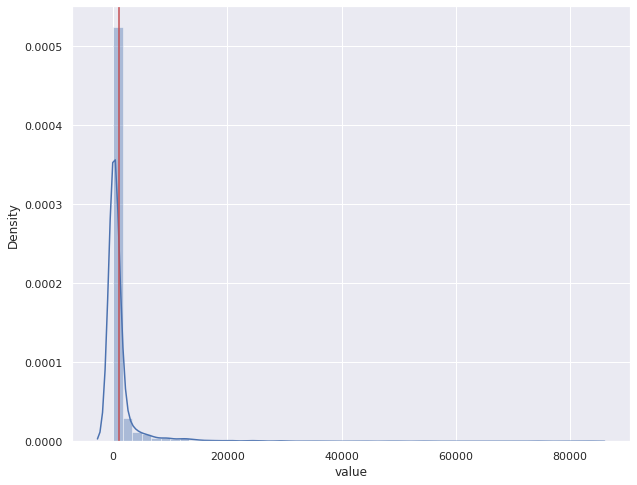

In [65]:
#ploting the distribution of 'value' paramter
plt.figure(figsize=(10, 8))
sns.distplot(maindata['value'])
plt.axvline(1000, color='r');
#plt.xlim((-100), 11000)

### **Kernel Density Estimation**

In [66]:
vals = maindata['value'].values.reshape(-1, 1)
#obtaing the kernel density estimation for guassian kernel with bandwidth 5
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(vals)

#defining the range
s = np.linspace(-1050, 10000)
e = kde.score_samples(s.reshape(-1,1))
#display(e)
#display(s)

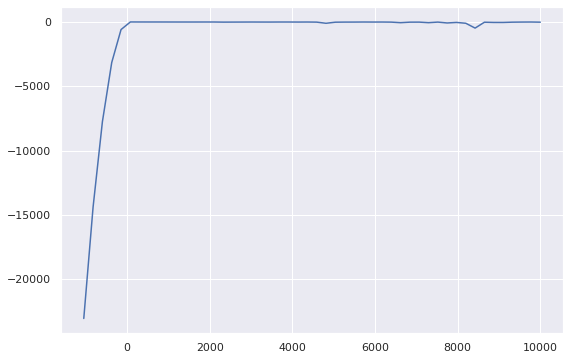

In [67]:
#ploting the kernel density sample in given range
plt.figure(figsize=(9, 6))
plt.plot(s, e);

In [68]:
#computing local maxima and local minina points
minima, maxima = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
display(minima)
display(maxima)

array([ 7, 11, 15, 20, 23, 26, 31, 34, 37, 39, 42, 45])

array([ 5,  8, 13, 18, 21, 24, 30, 32, 36, 38, 40, 43, 48])

In [69]:
#obtaining the index value at local maxima and local minima points
points = np.concatenate((s[minima], s[maxima]), axis=0)
display(points)
buckets = []

#creating buckets based on the obtained points 
for point in points:
    buckets.append(point)

array([ 528.57142857, 1430.6122449 , 2332.65306122, 3460.20408163,
       4136.73469388, 4813.26530612, 5940.81632653, 6617.34693878,
       7293.87755102, 7744.89795918, 8421.42857143, 9097.95918367,
         77.55102041,  754.08163265, 1881.63265306, 3009.18367347,
       3685.71428571, 4362.24489796, 5715.30612245, 6166.32653061,
       7068.36734694, 7519.3877551 , 7970.40816327, 8646.93877551,
       9774.48979592])

### **Forming Clusters**

In [70]:
#Sorting points
buckets = np.array(buckets)
buckets.sort()

In [71]:
#assigning clusters 
maindata['cluster'] = buckets.searchsorted(maindata.value)

In [72]:
maindata.groupby('cluster').head()

,Title,Release Year,Rating,Genre,type,country,director,total_votes,cast,duration,description,value,cluster
282,Pulp Fiction,1994,8.9,"Crime, Drama",0,221,1169,1780147,"John Travolta, Samuel L. Jackson, Uma Thurman,...",154,This stylized crime caper weaves together stor...,74028.775026,25
272,Schindler's List,1993,8.9,"Biography, Drama, History",0,221,1437,1183248,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",195,Oskar Schindler becomes an unlikely humanitari...,49216.810377,25
1032,Inception,2010,8.8,"Action, Adventure, Sci-Fi",0,261,304,2002816,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",148,"In this mind-bending sci-fi thriller, a man ru...",83280.804650,25
157,Gol Maal,1979,8.6,"Comedy, Romance",0,83,583,17381,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",137,When circumstances at work compel Ram to prete...,744.571226,2
1372,Much Ado About Nothing,2011,8.6,"Comedy, Romance",0,36,57,556,"Agustín Silva, Paulina García, Daniel Alcaíno,...",96,Carefree college student Vicente ends up in a ...,41.988556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Bee Movie,2007,6.1,"Animation, Adventure, Comedy",0,222,1428,138462,"Jerry Seinfeld, Renée Zellweger, Matthew Brode...",92,"Barry, a worker bee stuck in a dead-end job ma...",5783.525077,13
569,Starsky & Hutch,2004,6.1,"Comedy, Crime",0,221,1508,136822,"Ben Stiller, Owen Wilson, Vince Vaughn, Juliet...",101,New undercover cop partners Starsky and Hutch ...,5715.816099,13
604,The Box,2009,5.6,"Drama, Fantasy, Mystery",0,221,1229,87997,"Cameron Diaz, James Marsden, Frank Langella, J...",116,A couple must decide whether to push a button ...,3684.669329,8
403,Charlie's Angels,2000,5.5,"Action, Adventure, Comedy",0,238,960,173640,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...",98,"Three beauties use their looks, charm and mart...",7243.333378,17


In [73]:
maindata.groupby('cluster').size()

cluster
0     1053
1      759
2       91
3      114
4       55
5       43
6       33
7       25
8        6
9       17
10       4
11      12
12      23
13       3
14       2
15      11
16       7
17       4
19       2
20       2
21       5
23       4
24      10
25      70
dtype: int64

## **TF-IDF VECTORIZATION**

In [74]:
#importing the required library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#computing the similarity matrix using TF-IDF Vectorization on parameter 'Genre'
tf_idf = TfidfVectorizer()
grid = tf_idf.fit_transform(maindata['Genre']) 

In [75]:
#to compute the similarity score for input index with other movies in the dataset
index1=2
krnl = linear_kernel(grid[index1], grid) #xTy
similarityScore = list(enumerate(krnl[0]))
similarityScore = sorted(similarityScore, key=lambda x: x[1], reverse=True)
print(similarityScore)

[(2, 1.0), (25, 1.0), (292, 1.0), (563, 1.0), (642, 1.0), (775, 1.0), (838, 1.0), (958, 1.0), (981, 1.0), (1050, 1.0), (1214, 1.0), (1530, 1.0), (1667, 1.0), (1739, 1.0), (2328, 1.0), (2253, 0.9357823397680782), (1202, 0.862981886001511), (1246, 0.862981886001511), (1734, 0.862981886001511), (2118, 0.862981886001511), (2212, 0.862981886001511), (2326, 0.862981886001511), (245, 0.838478350488372), (439, 0.838478350488372), (441, 0.838478350488372), (993, 0.838478350488372), (1148, 0.838478350488372), (1196, 0.838478350488372), (1326, 0.838478350488372), (1850, 0.838478350488372), (1988, 0.838478350488372), (1885, 0.8130926887387387), (2139, 0.8130926887387387), (1351, 0.801376136496357), (1865, 0.801376136496357), (114, 0.7973443436333336), (665, 0.7973443436333336), (899, 0.7973443436333336), (1045, 0.7973443436333336), (1184, 0.7973443436333336), (1726, 0.7973443436333336), (2079, 0.7973443436333336), (2143, 0.7973443436333336), (2183, 0.7973443436333336), (2217, 0.7973443436333336), 

In [116]:
#to find the index of the movie based on the paramter 'Title'
maindata=maindata.reset_index()
indices = pd.Series(maindata.index, index=maindata['Title']).drop_duplicates()

In [158]:
def get_recommendations(titlee):
  #obtaining the movie index 
    movie_index = indices[titlee]
  #to print the input movie details 
    print(maindata.iloc[movie_index])
    
  #using linear kernel to compute the similarity score with input movie to all the movies in the dataset using above obtained matrix
    krnl = linear_kernel(grid[movie_index], grid) #xTy
    similarityScore = list(enumerate(krnl[0]))
    
    #To sort the similarity score and return the values with similarity score greater than 0.7
    similarityScore = sorted(similarityScore, key=lambda x: x[1], reverse=True)
    indexes = [k[0] for k in similarityScore if k[0] != movie_index and k[1] > 0.7]
    
    #defining the constraints 
    constraint1 = (maindata.index.isin(indexes))
    constraint2 = (maindata.cluster == maindata.iloc[movie_index]['cluster'])
    constraint3 = (maindata.director == maindata.iloc[movie_index]['director'])
    
    selected = maindata.loc[constraint1 & (constraint2 | constraint3 )] \
       .sort_values(by='value', ascending=False).head(20)
    #display(selected)
    print(selected[['Title', 'cluster', 'Genre']])

**OUTPUT**

In [159]:
get_recommendations("Singham")

level_0                                                       646
index                                                        1212
Title                                                     Singham
Release Year                                                 2011
Rating                                                        6.8
Genre                                               Action, Drama
type                                                            0
country                                                        83
director                                                     1261
total_votes                                                 13927
cast            Ajay Devgn, Kajal Aggarwal, Prakash Raj, Sonal...
duration                                                      142
description     A police inspector kills himself after a power...
value                                                      605.11
cluster                                                         2
Name: 646,

In [118]:
get_recommendations('Ajab Prem Ki Ghazab Kahani')

level_0                                                      1019
index                                                         989
Title                                  Ajab Prem Ki Ghazab Kahani
Release Year                                                 2009
Rating                                                        6.3
Genre                                     Action, Comedy, Romance
type                                                            0
country                                                        83
director                                                     1198
total_votes                                                 12278
cast            Ranbir Kapoor, Katrina Kaif, Govind Namdeo, Da...
duration                                                      150
description     A young man's obsession with making others hap...
value                                                     536.231
cluster                                                         2
Name: 1019

In [80]:
get_recommendations("Avengers: Infinity War")

index                                                        1631
Title                                      Avengers: Infinity War
Release Year                                                 2018
Rating                                                        8.4
Genre                                   Action, Adventure, Sci-Fi
type                                                            0
country                                                       221
director                                                      136
total_votes                                                796486
cast            Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...
duration                                                      150
description     Superheroes amass to stop intergalactic sociop...
value                                                     33131.4
cluster                                                        25
Name: 25, dtype: object
                        Title  cluster              

# **2nd TYPE OF RECOMMENDATION SYSTEM**

**TF-IDF Vectorization based on single parameter**

In [81]:
tfidf = TfidfVectorizer(stop_words='english')

#filling the NAN values 
jointabc['description'] = jointabc['description'].fillna('')

#computing the TF-IDF matrix for single parameter 'description'
tfidf_matrix = tfidf.fit_transform(jointabc['description'])

#printing the shape of the matrix 
tfidf_matrix.shape

(2394, 7760)

In [82]:
from sklearn.metrics.pairwise import linear_kernel

#obtaining the cosine similarity values
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [83]:
#Reseting the index and finding the index number based on input title value
jointabc=jointabc.reset_index()
indices = pd.Series(jointabc.index, index=jointabc['Title']).drop_duplicates()

In [84]:
def get_recommendations1(titlle, cosine_sim=cosine_sim):
    idx = indices[titlle]
    print(jointabc.iloc[idx])
    
    #obtaining the similarity score of the input movie with other movies given in dataset
    similarityScore = list(enumerate(cosine_sim[idx]))
  
    #sorting the similarity scores 
    similarityScore = sorted(similarityScore, key=lambda x: x[1], reverse=True)
   
    #obtaining the top 10 movies in the sorted list
    similarityScore = similarityScore[1:11]
   
    index = [k[0] for k in similarityScore]
    
    return jointabc['Title'].iloc[index]

**OUTPUT**

In [85]:
get_recommendations1('Ajab Prem Ki Ghazab Kahani')

index                                                         989
Title                                  Ajab Prem Ki Ghazab Kahani
Release Year                                                 2009
Rating                                                        6.3
total_votes                                                 12278
Genre                                     Action, Comedy, Romance
show_id                                                      s359
type                                                        Movie
title                                  Ajab Prem Ki Ghazab Kahani
director                                        Rajkumar Santoshi
cast            Ranbir Kapoor, Katrina Kaif, Govind Namdeo, Da...
country                                                     India
date_added                                       October 25, 2020
release_year                                                 2009
rating                                                      TV-14
duration  

1906                  Ishqedarriyaan
1527                         Chaahat
2347               Veerey Ki Wedding
2046    The Legend of Michael Mishra
1075                 Marriage Palace
127             Kabhi Haan Kabhi Naa
497                    Ahista Ahista
419                           Kaabil
1407                       Stephanie
951                         The Trap
Name: Title, dtype: object

In [86]:
get_recommendations1('Avengers: Infinity War')

index                                                        1631
Title                                      Avengers: Infinity War
Release Year                                                 2018
Rating                                                        8.4
total_votes                                                796486
Genre                                   Action, Adventure, Sci-Fi
show_id                                                      s636
type                                                        Movie
title                                      Avengers: Infinity War
director                                 Anthony Russo, Joe Russo
cast            Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...
country                                             United States
date_added                                      December 25, 2018
release_year                                                 2018
rating                                                      PG-13
duration  

2103           The Darkness
1687                 Race 2
552                   Kalki
1996                  Kalki
457                   Balto
1393    All Day and a Night
1205                  Mercy
1875                  Mercy
2158                  Mercy
137             The Fighter
Name: Title, dtype: object

In [87]:
get_recommendations1('Singham')

index                                                        1212
Title                                                     Singham
Release Year                                                 2011
Rating                                                        6.8
total_votes                                                 13927
Genre                                               Action, Drama
show_id                                                     s5628
type                                                        Movie
title                                                     Singham
director                                             Rohit Shetty
cast            Ajay Devgn, Kajal Aggarwal, Prakash Raj, Sonal...
country                                                     India
date_added                                      November 19, 2020
release_year                                                 2011
rating                                                      TV-14
duration  

124          Gangaajal
339            Sunrise
992            Sunrise
1184    Raja Natwarlal
1323      Class of '83
340            Talaash
391            Michael
561            Michael
1443           Michael
1701           Michael
Name: Title, dtype: object

# **3rd TYPE OF RECOMMENDATION SYSTEM**

**Using Count Vectorization based on multiple parameters**

In [88]:
#replacing the NAN values
filledna=jointabc.fillna('')
filledna.head(2)

,index,Title,Release Year,Rating,total_votes,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,282,Pulp Fiction,1994,8.9,1780147,"Crime, Drama",s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
1,272,Schindler's List,1993,8.9,1183248,"Biography, Drama, History",s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...


In [89]:
#Pre-processing the parameter values
def content_cleaning (data):
        return str.lower(data.replace(" ", ""))

In [90]:
#defining the 5 important parmeters
parameters=['Genre','director','cast','country','Title']
filledna=filledna[parameters]

In [91]:
for i in parameters:
    filledna[i] = filledna[i].apply(content_cleaning )
    
filledna.head()

,Genre,director,cast,country,Title
0,"crime,drama",quentintarantino,"johntravolta,samuell.jackson,umathurman,harvey...",unitedstates,pulpfiction
1,"biography,drama,history",stevenspielberg,"liamneeson,benkingsley,ralphfiennes,carolinego...",unitedstates,schindler'slist
2,"action,adventure,sci-fi",christophernolan,"leonardodicaprio,josephgordon-levitt,ellenpage...","unitedstates,unitedkingdom",inception
3,"comedy,romance",hrishikeshmukherjee,"amolpalekar,bindiyagoswami,devenverma,utpaldut...",india,golmaal
4,"comedy,romance",alejandrofernándezalmendras,"agustínsilva,paulinagarcía,danielalcaíno,aleja...","chile,unitedstates,france",muchadoaboutnothing


In [92]:
#creating a new parameter 'bag of words'
def create_bag_of_words(x):
   return x['Title']+ ' ' + x['Genre'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['country']

In [93]:
filledna['bag_of_words'] = filledna.apply(create_bag_of_words, axis=1)
filledna.head()

,Genre,director,cast,country,Title,bag_of_words
0,"crime,drama",quentintarantino,"johntravolta,samuell.jackson,umathurman,harvey...",unitedstates,pulpfiction,"pulpfiction crime,drama quentintarantino johnt..."
1,"biography,drama,history",stevenspielberg,"liamneeson,benkingsley,ralphfiennes,carolinego...",unitedstates,schindler'slist,"schindler'slist biography,drama,history steven..."
2,"action,adventure,sci-fi",christophernolan,"leonardodicaprio,josephgordon-levitt,ellenpage...","unitedstates,unitedkingdom",inception,"inception action,adventure,sci-fi christophern..."
3,"comedy,romance",hrishikeshmukherjee,"amolpalekar,bindiyagoswami,devenverma,utpaldut...",india,golmaal,"golmaal comedy,romance hrishikeshmukherjee amo..."
4,"comedy,romance",alejandrofernándezalmendras,"agustínsilva,paulinagarcía,danielalcaíno,aleja...","chile,unitedstates,france",muchadoaboutnothing,"muchadoaboutnothing comedy,romance alejandrofe..."


In [164]:
#importing the necessary libraries 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#computing the sparse matrix using count vectorization
cnt = CountVectorizer(stop_words='english')
cnt_grid = cnt.fit_transform(filledna['bag_of_words'])

similarity  = cosine_similarity(cnt_grid, cnt_grid)
print(similarity)

[[1.         0.10814761 0.05143445 ... 0.06299408 0.11111111 0.05892557]
 [0.10814761 1.         0.05006262 ... 0.06131393 0.10814761 0.05735393]
 [0.05143445 0.05006262 1.         ... 0.11664237 0.05143445 0.        ]
 ...
 [0.06299408 0.06131393 0.11664237 ... 1.         0.06299408 0.06681531]
 [0.11111111 0.10814761 0.05143445 ... 0.06299408 1.         0.11785113]
 [0.05892557 0.05735393 0.         ... 0.06681531 0.11785113 1.        ]]


In [95]:
#Reseting the index and finding the index number based on input title value
filledna=filledna.reset_index()
indexes = pd.Series(filledna.index, index=filledna['Title'])

In [140]:
def get_recommendations2(Title, cosine_sim2):
    indices = indexes[Title]
    print(jointabc.iloc[indices])
    
     #obtaining the similarity score of the input movie with other movies given in dataset
    similarityScore = list(enumerate(cosine_sim2[indices]))
    
     #sorting the similarity scores
    similarityScore = sorted(similarityScore, key=lambda x: x[1], reverse=True)
     
    #obtaining the top 10 movies in the sorted list
    similarityScore = similarityScore[1:21]

    index = [i[0] for i in similarityScore]

    return jointabc['Title'].iloc[index]

**OUTPUT**

In [141]:
get_recommendations2('ajabpremkighazabkahani', similarity )

index                                                         989
Title                                  Ajab Prem Ki Ghazab Kahani
Release Year                                                 2009
Rating                                                        6.3
total_votes                                                 12278
Genre                                     Action, Comedy, Romance
show_id                                                      s359
type                                                        Movie
title                                  Ajab Prem Ki Ghazab Kahani
director                                        Rajkumar Santoshi
cast            Ranbir Kapoor, Katrina Kaif, Govind Namdeo, Da...
country                                                     India
date_added                                       October 25, 2020
release_year                                                 2009
rating                                                      TV-14
duration  

876                    Jagga Jasoos
789                        Bheeshma
304                         Tamasha
1663                        Barsaat
2004                        Phantom
1416            Mumbai Delhi Mumbai
2236                       Judwaa 2
48                  Andaz Apna Apna
630                           Pukar
1580          Maine Pyaar Kyun Kiya
1708                     Khoobsurat
1051                Raja Hindustani
1070    Phir Bhi Dil Hai Hindustani
1401         Tere Naal Love Ho Gaya
64                           Barfi!
197                     Wake Up Sid
551                         Welcome
1577                           Zero
2025           What's Your Raashee?
2155                     One by Two
Name: Title, dtype: object

In [98]:
get_recommendations2('avengers:infinitywar', similarity )

index                                                        1631
Title                                      Avengers: Infinity War
Release Year                                                 2018
Rating                                                        8.4
total_votes                                                796486
Genre                                   Action, Adventure, Sci-Fi
show_id                                                      s636
type                                                        Movie
title                                      Avengers: Infinity War
director                                 Anthony Russo, Joe Russo
cast            Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...
country                                             United States
date_added                                      December 25, 2018
release_year                                                 2018
rating                                                      PG-13
duration  

568     Solo: A Star Wars Story
293               Black Panther
102              Thor: Ragnarok
2193           The Darkest Dawn
1005              Transcendence
442                  Real Steel
970                   Time Trap
993                    Spectral
1229           The Time Machine
1552                   Æon Flux
Name: Title, dtype: object

In [155]:
get_recommendations2('singham', similarity )

index                                                        1212
Title                                                     Singham
Release Year                                                 2011
Rating                                                        6.8
total_votes                                                 13927
Genre                                               Action, Drama
show_id                                                     s5628
type                                                        Movie
title                                                     Singham
director                                             Rohit Shetty
cast            Ajay Devgn, Kajal Aggarwal, Prakash Raj, Sonal...
country                                                     India
date_added                                      November 19, 2020
release_year                                                 2011
rating                                                      TV-14
duration  

254          Golmaal: Fun Unlimited
2092                     Himmatwala
274     Once Upon a Time in Mumbaai
61       The Legend of Bhagat Singh
1013                       Guna 369
257                        Apaharan
883                Fakta Ladh Mhana
932                          Pitaah
1447           Singh Saab the Great
86                          Company
115                            Guru
124                       Gangaajal
812                            Guru
2012                          Insan
857                           Metro
1186                        Soldier
1996                          Kalki
282                            Yuva
2230                           Tezz
1211                        Soldier
Name: Title, dtype: object

# **4th TYPE OF RECOMMENDATION SYSTEM**

**Here we have tried to build a hybrid model using CLUSTERING and COUNT VECTORIZATION techniques**

In [100]:
#maindata is the dataset where the movies are bifurcated into clusters
filledna1=maindata.fillna('') #replacing the NAN values
filledna1.head(2)

,index,Title,Release Year,Rating,Genre,type,country,director,total_votes,cast,duration,description,value,cluster
0,282,Pulp Fiction,1994,8.9,"Crime, Drama",0,221,1169,1780147,"John Travolta, Samuel L. Jackson, Uma Thurman,...",154,This stylized crime caper weaves together stor...,74028.775026,25
1,272,Schindler's List,1993,8.9,"Biography, Drama, History",0,221,1437,1183248,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",195,Oskar Schindler becomes an unlikely humanitari...,49216.810377,25


In [101]:
def content_cleaning1 (data):
        return str.lower(data.replace(" ", ""))

In [102]:
#defining the 5 important parmeters
parameters1=['Genre','description','cast']
#filledna1=filledna1[parameters1]

In [103]:
for i in parameters1:
    filledna1[i] = filledna1[i].apply(content_cleaning1 )
    
filledna1.head()

,index,Title,Release Year,Rating,Genre,type,country,director,total_votes,cast,duration,description,value,cluster
0,282,Pulp Fiction,1994,8.9,"crime,drama",0,221,1169,1780147,"johntravolta,samuell.jackson,umathurman,harvey...",154,thisstylizedcrimecaperweavestogetherstoriesfea...,74028.775026,25
1,272,Schindler's List,1993,8.9,"biography,drama,history",0,221,1437,1183248,"liamneeson,benkingsley,ralphfiennes,carolinego...",195,"oskarschindlerbecomesanunlikelyhumanitarian,sp...",49216.810377,25
2,1032,Inception,2010,8.8,"action,adventure,sci-fi",0,261,304,2002816,"leonardodicaprio,josephgordon-levitt,ellenpage...",148,"inthismind-bendingsci-fithriller,amanrunsanesp...",83280.804650,25
3,157,Gol Maal,1979,8.6,"comedy,romance",0,83,583,17381,"amolpalekar,bindiyagoswami,devenverma,utpaldut...",137,whencircumstancesatworkcompelramtopretendtohav...,744.571226,2
4,1372,Much Ado About Nothing,2011,8.6,"comedy,romance",0,36,57,556,"agustínsilva,paulinagarcía,danielalcaíno,aleja...",96,carefreecollegestudentvicenteendsupinadesperat...,41.988556,0


In [104]:
#creating a new parameter 'bag of words'
def create_bag_of_words1(x):
   return  x['Genre'] + ' ' + x['description'] + ' ' + x['cast'] 

In [105]:
filledna1['bag_of_words'] = filledna1.apply(create_bag_of_words1, axis=1)
filledna1.head()

,index,Title,Release Year,Rating,Genre,type,country,director,total_votes,cast,duration,description,value,cluster,bag_of_words
0,282,Pulp Fiction,1994,8.9,"crime,drama",0,221,1169,1780147,"johntravolta,samuell.jackson,umathurman,harvey...",154,thisstylizedcrimecaperweavestogetherstoriesfea...,74028.775026,25,"crime,drama thisstylizedcrimecaperweavestogeth..."
1,272,Schindler's List,1993,8.9,"biography,drama,history",0,221,1437,1183248,"liamneeson,benkingsley,ralphfiennes,carolinego...",195,"oskarschindlerbecomesanunlikelyhumanitarian,sp...",49216.810377,25,"biography,drama,history oskarschindlerbecomesa..."
2,1032,Inception,2010,8.8,"action,adventure,sci-fi",0,261,304,2002816,"leonardodicaprio,josephgordon-levitt,ellenpage...",148,"inthismind-bendingsci-fithriller,amanrunsanesp...",83280.804650,25,"action,adventure,sci-fi inthismind-bendingsci-..."
3,157,Gol Maal,1979,8.6,"comedy,romance",0,83,583,17381,"amolpalekar,bindiyagoswami,devenverma,utpaldut...",137,whencircumstancesatworkcompelramtopretendtohav...,744.571226,2,"comedy,romance whencircumstancesatworkcompelra..."
4,1372,Much Ado About Nothing,2011,8.6,"comedy,romance",0,36,57,556,"agustínsilva,paulinagarcía,danielalcaíno,aleja...",96,carefreecollegestudentvicenteendsupinadesperat...,41.988556,0,"comedy,romance carefreecollegestudentvicenteen..."


In [106]:
#importing the necessary libraries 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#computing the sparse matrix using count vectorization
cnt1 = CountVectorizer(stop_words='english')
cnt_grid1 = cnt.fit_transform(filledna1['bag_of_words'])

similarity1  = cosine_similarity(cnt_grid1, cnt_grid1)
print(similarity1)

[[1.         0.05407381 0.         ... 0.06622662 0.05735393 0.05564149]
 [0.05407381 1.         0.         ... 0.06804138 0.05892557 0.0571662 ]
 [0.         0.         1.         ... 0.12598816 0.         0.        ]
 ...
 [0.06622662 0.06804138 0.12598816 ... 1.         0.07216878 0.070014  ]
 [0.05735393 0.05892557 0.         ... 0.07216878 1.         0.12126781]
 [0.05564149 0.0571662  0.         ... 0.070014   0.12126781 1.        ]]


In [107]:
#Reseting the index and finding the index number based on input title value
filledna1=filledna1.reset_index(drop='true')
indexes1 = pd.Series(filledna1.index, index=filledna1['Title'])

In [167]:
def get_recommendations3(Titllle, cosine_sim3):
    indices = indexes1[Titllle]
    print(filledna1.iloc[indices])
    
     #obtaining the similarity score of the input movie with other movies given in dataset
    similarityScore1 = list(enumerate(cosine_sim3[indices]))
    
     #sorting the similarity scores
    similarityScore1 = sorted(similarityScore1, key=lambda x: x[1], reverse=True)
    
    #Obtain the values with similarity score greater than 0.15
    indexes2 = [k[0] for k in similarityScore1 if k[0] != indices and k[1] > 0.12]
    #Here we need to keep the limiting similarity score very less as number of parameters taken into consideration 
    #are more and which is why a problem like overfitting may occur here as there would very less movies in a cluster
    #with similarity score very similar to the input movie's but keeping the score low might give some irrelevant movies.
     
    #defining the constraints 
    constraint1 = (filledna1.index.isin(indexes2))
    constraint2 = (filledna1.cluster == filledna1.iloc[indices]['cluster'])

    selected1 = filledna1.loc[constraint1 & (constraint2)] \
       .sort_values(by='value', ascending=False).head(20)
   
    #print the result
    print(selected1[['Title', 'cluster', 'Genre']])

**OUTPUT**

In [162]:
get_recommendations3('Ajab Prem Ki Ghazab Kahani', similarity1)

index                                                         989
Title                                  Ajab Prem Ki Ghazab Kahani
Release Year                                                 2009
Rating                                                        6.3
Genre                                       action,comedy,romance
type                                                            0
country                                                        83
director                                                     1198
total_votes                                                 12278
cast            ranbirkapoor,katrinakaif,govindnamdeo,darshanj...
duration                                                      150
description     ayoungman'sobsessionwithmakingothershappydrive...
value                                                     536.231
cluster                                                         2
bag_of_words    action,comedy,romance ayoungman'sobsessionwith...
Name: 1019

In [153]:
get_recommendations3('Avengers: Infinity War', similarity1)

index                                                        1631
Title                                      Avengers: Infinity War
Release Year                                                 2018
Rating                                                        8.4
Genre                                     action,adventure,sci-fi
type                                                            0
country                                                       221
director                                                      136
total_votes                                                796486
cast            robertdowneyjr.,joshbrolin,markruffalo,tomhidd...
duration                                                      150
description     superheroesamasstostopintergalacticsociopathth...
value                                                     33131.4
cluster                                                        25
bag_of_words    action,adventure,sci-fi superheroesamasstostop...
Name: 25, 

In [168]:
get_recommendations3("Singham", similarity1)

index                                                        1212
Title                                                     Singham
Release Year                                                 2011
Rating                                                        6.8
Genre                                                action,drama
type                                                            0
country                                                        83
director                                                     1261
total_votes                                                 13927
cast            ajaydevgn,kajalaggarwal,prakashraj,sonalikulka...
duration                                                      142
description     apoliceinspectorkillshimselfafterapowerfulgang...
value                                                      605.11
cluster                                                         2
bag_of_words    action,drama apoliceinspectorkillshimselfafter...
Name: 646,